In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
# read csv file
folder = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves'
file = '/Users/lucaszhuang1210gmail.com/Documents/GitHub/sunnyhills/data/current/processed/two_min_lightcurves/TIC_5714469.csv'

tic_id = file[file.rfind('_')+1:-4]
print(tic_id)

df = pd.read_csv(file)
df

5714469


,clean_time,clean_flux,trend_time,trend_flux,no_flare_raw_time,no_flare_raw_flux,raw_time,raw_flux
0,1572.384335,0.929652,1572.384335,0.970888,1572.384335,1572.384335,1572.384335,0.902588
1,1572.385724,0.915736,1572.385724,0.970788,1572.385724,1572.385724,1572.385724,0.888986
2,1572.387113,0.946128,1572.387113,0.970747,1572.387113,1572.387113,1572.387113,0.918451
3,1572.388502,0.926437,1572.388502,0.970632,1572.388502,1572.388502,1572.388502,0.899230
4,1572.389891,0.962131,1572.389891,0.970398,1572.389891,1572.389891,1572.389891,0.933650
...,...,...,...,...,...,...,...,...
13471,NaN,NaN,NaN,NaN,NaN,NaN,1595.679778,0.965796
13472,NaN,NaN,NaN,NaN,NaN,NaN,1595.681167,0.979258
13473,NaN,NaN,NaN,NaN,NaN,NaN,1595.682555,0.990258
13474,NaN,NaN,NaN,NaN,NaN,NaN,1595.683944,0.980177


In [3]:
# read columns, turn into numpy arrays
clean_time = np.array(df['clean_time'])
clean_flux = np.array(df['clean_flux'])
trend_time = np.array(df['trend_time'])
trend_flux = np.array(df['trend_flux'])


In [4]:
# removing NaNs by masking 
mask = np.isfinite(clean_flux)

clean_time = clean_time[mask]
clean_flux = clean_flux[mask]
trend_time = trend_time[mask]
trend_flux = trend_flux[mask]

print(trend_flux)

[0.97088837 0.97078826 0.97074706 ... 0.99708916 0.99692348 0.99685575]


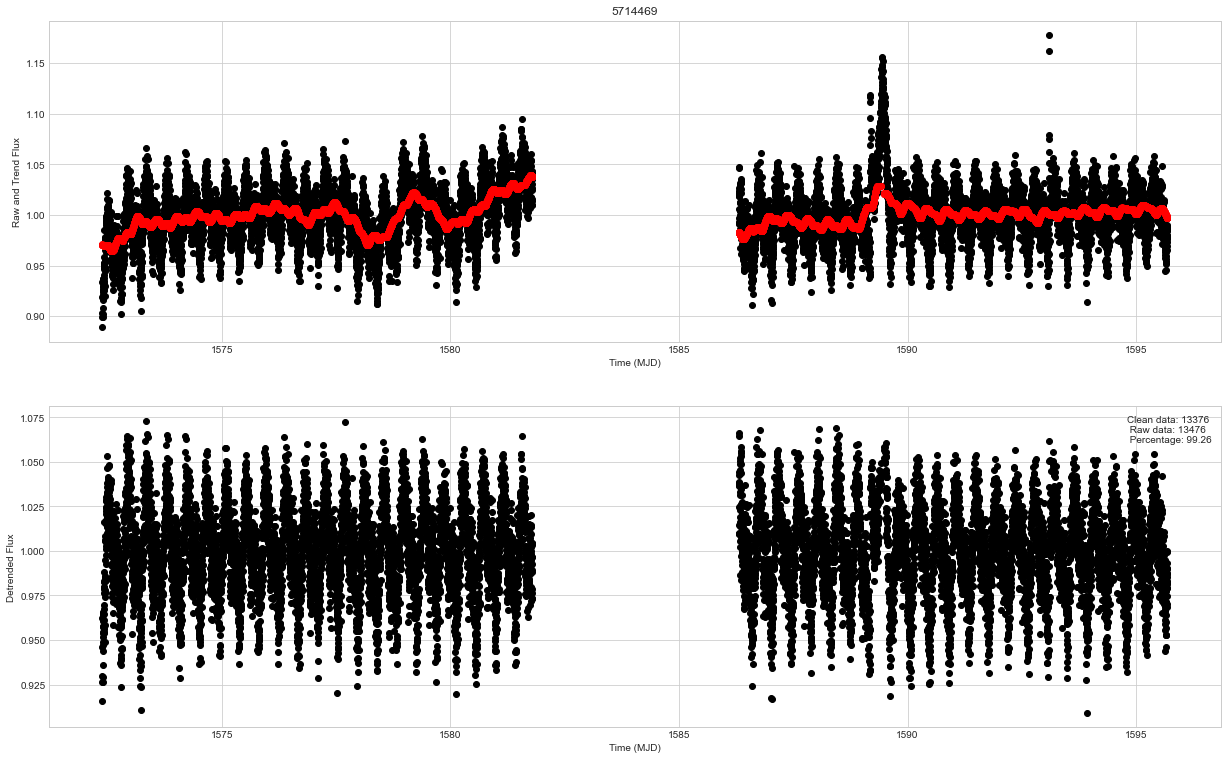

In [5]:
# all data are set, ready to graph
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(21,13))

# ax1
ax1.plot(df['raw_time'], df['raw_flux'], 'o', color='black')
ax1.plot(trend_time, trend_flux, 'o', color='red')
# ax1 labels
ax1.set_title(tic_id)
ax1.set_xlabel('Time (MJD)')
ax1.set_ylabel('Raw and Trend Flux')

# ax2
ax2.plot(clean_time, clean_flux, 'o', color='black')
# ax2 labels
ax2.set_xlabel('Time (MJD)')
ax2.set_ylabel('Detrended Flux')

# make a legend for ax2
str = "Clean data: {} \n Raw data: {} \n Percentage: {}".format(len(clean_time), 
        len(df['raw_time']), round(len(clean_time)/len(df['raw_time'])*100, 2))
plt.plot([], [], ' ', label=str)
plt.legend()
plt.show()